# Libraries

In [1]:
# DataFrame
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/supermarket_sales - Sheet1.csv')

# Attribute information

**Invoice** id:ID

**Branch**: Branch of supercenter (A,B,C).

**City**: Location of supercenters

**Customer type**:(member,Normal)

**Gender**: Gender type of customer

**Product line**: General item categorization groups -(Electronic
accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel)

**Unit price**: Price of each product in $

**Quantity**: Number of products purchased by customer

**Tax**: 5% tax fee for customer buying

**Total**: Total price including tax

**Date**: Date of purchase

**Time**: Purchase time (10am to 9pm)

**Payment**: Payment used by customer for purchase (Cash, Credit card and Ewallet)

**COGS**: Cost of goods sold

**Gross margin percentage**: Gross margin percentage

**Gross income**: Gross income

**Rating**: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# **Exploratory Data Analysis (EDA)**

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.shape

(1000, 17)

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
print(df.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


I merged the 'date' and 'time' columns into a new column called 'DateTime' and converted it to the datetime64 format. Then, I converted this datetime column into numerical values.

In [8]:
df['DateTime'] = df['Date']+" "+ df['Time']
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'] = (df['DateTime'] - pd.Timestamp('1970-01-01'))/ pd.Timedelta('100000s')


Drop original 'Date' and 'Time' columns

In [9]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [10]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,15466.9368
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,15520.4094
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,15516.1938
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,15486.2118
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,15496.2222


In [11]:
columns_object=df.select_dtypes(include=['object']).columns
columns_object

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Payment'],
      dtype='object')

In [12]:
columns_not_object=df.select_dtypes(exclude=['object']).columns
columns_not_object

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'DateTime'],
      dtype='object')

In [13]:
for col in columns_object :
    print(col+":=  "+str(len(set(df[col]))))

Invoice ID:=  1000
Branch:=  3
City:=  3
Customer type:=  2
Gender:=  2
Product line:=  6
Payment:=  3


In [14]:
for col in columns_not_object :
    print(col+":=  "+str(len(df[col].unique())))

Unit price:=  943
Quantity:=  10
Tax 5%:=  990
Total:=  990
cogs:=  990
gross margin percentage:=  1
gross income:=  990
Rating:=  61
DateTime:=  994


In [15]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [16]:
df.isnull().any()

,0
Invoice ID,False
Branch,False
City,False
Customer type,False
Gender,False
Product line,False
Unit price,False
Quantity,False
Tax 5%,False
Total,False


zero duplicated columns

In [17]:
df.duplicated().sum()

0

In [18]:
df['Branch'].value_counts()

,count
Branch,
A,340
B,332
C,328


In [19]:
df['Gender'].value_counts()

,count
Gender,
Female,501
Male,499


In [20]:
df['City'].value_counts()

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


In [21]:
df['Customer type'].value_counts()

,count
Customer type,
Member,501
Normal,499


In [22]:
df['Payment'].value_counts()

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


In [23]:
df['Product line'].value_counts()

,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


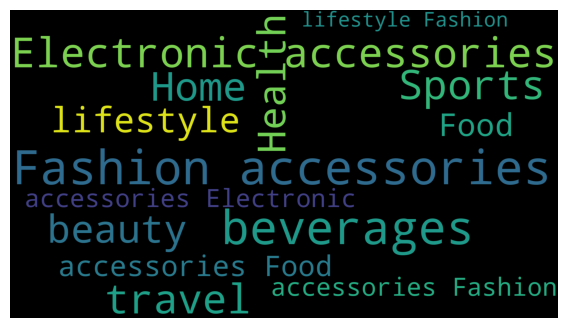

In [24]:
from wordcloud import WordCloud
plt.subplots(figsize=(10,4))
wordcloud = WordCloud(background_color='Black',width=1920,height=1080).generate(" ".join(df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

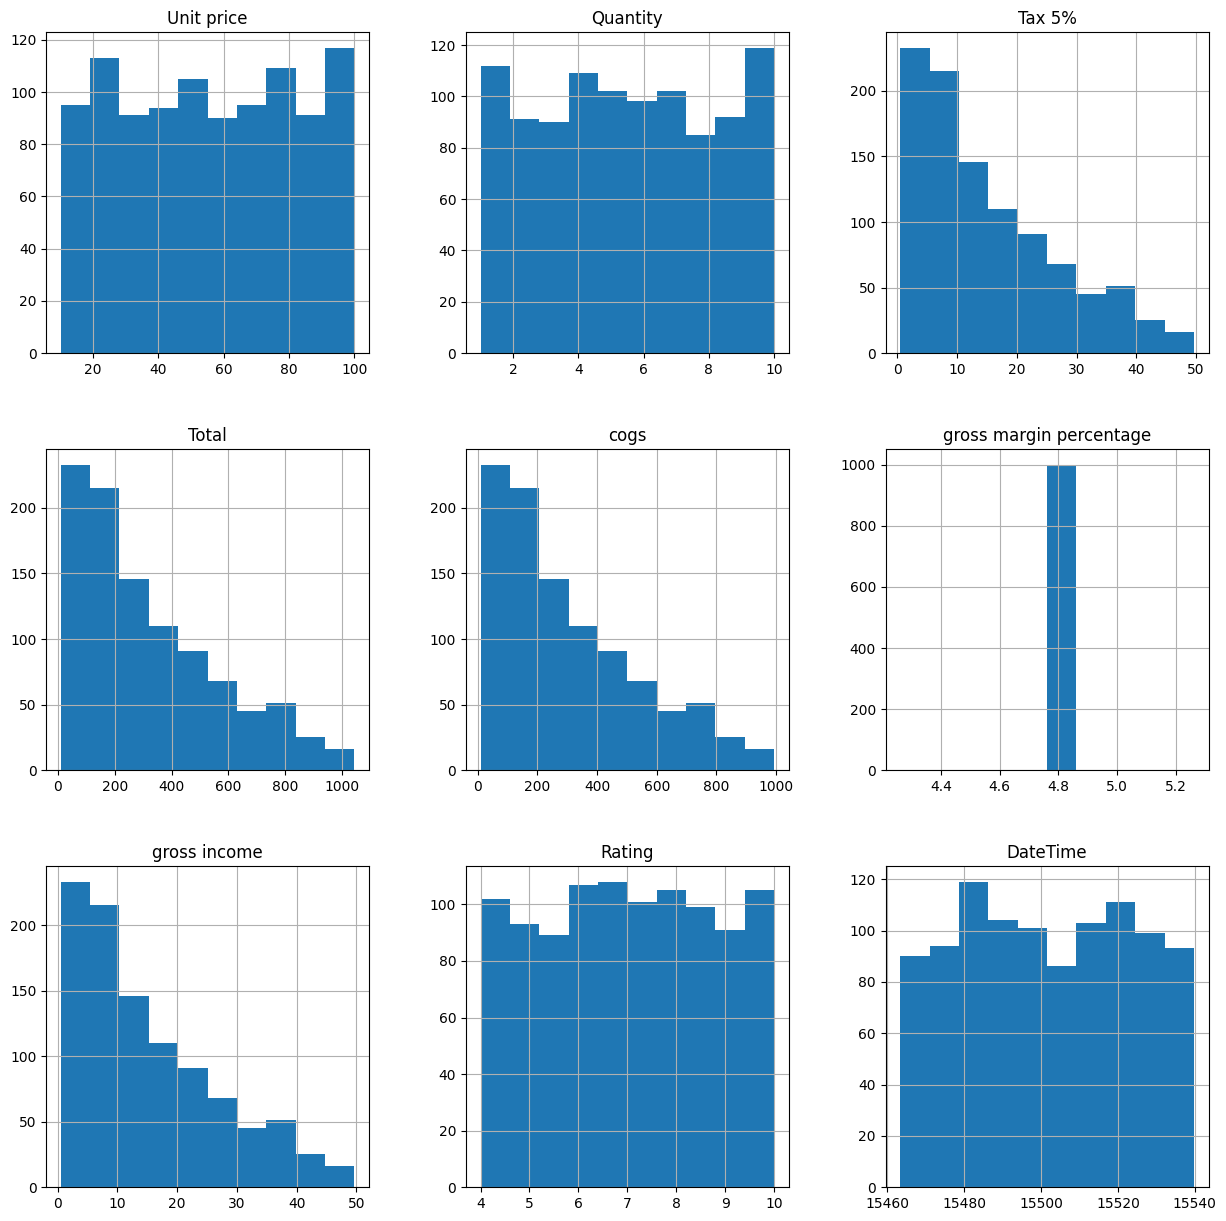

In [25]:
df.hist(figsize=(15,15))
plt.show()

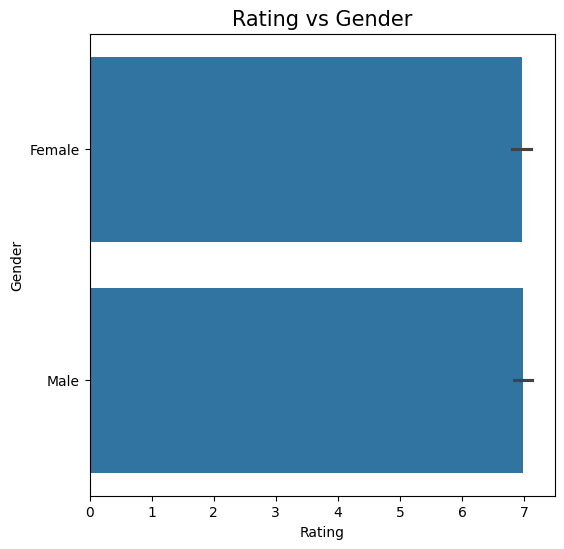

In [26]:
plt.style.use("default")
plt.figure(figsize=(6,6))
sns.barplot(x="Rating", y="Gender", data=df)
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

Text(0, 0.5, 'Rating')

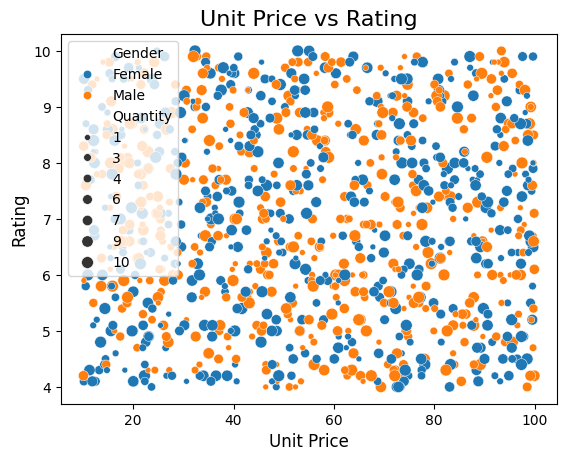

In [27]:
sns.scatterplot(data=df, x='Unit price', y='Rating',hue='Gender',size='Quantity')
plt.title('Unit Price vs Rating', fontsize=16)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Rating', fontsize=12)

Text(0, 0.5, 'Rating')

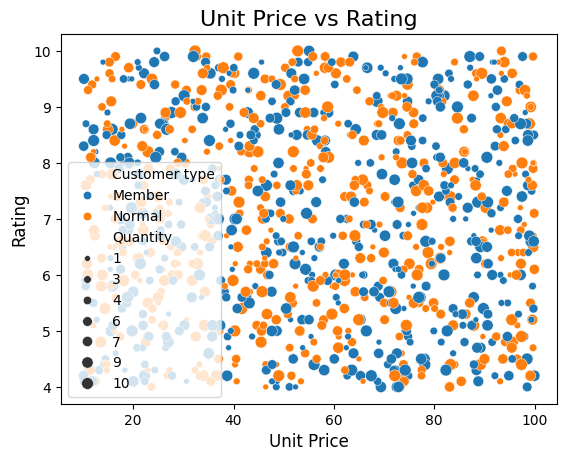

In [28]:
sns.scatterplot(data=df, x='Unit price', y='Rating',hue='Customer type',size='Quantity')
plt.title('Unit Price vs Rating', fontsize=16)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Rating', fontsize=12)

Text(0, 0.5, 'Rating')

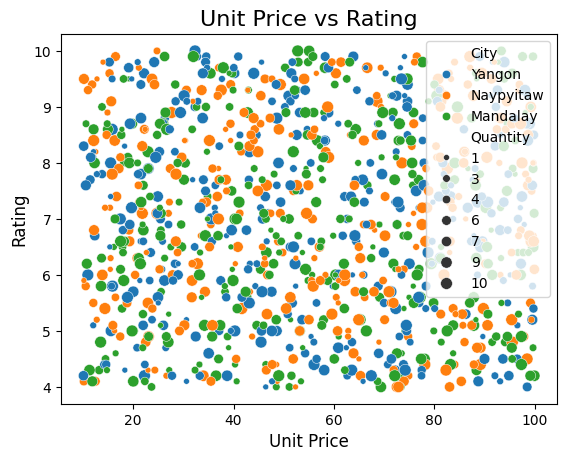

In [29]:
sns.scatterplot(data=df, x='Unit price', y='Rating',hue='City',size='Quantity')
plt.title('Unit Price vs Rating', fontsize=16)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Rating', fontsize=12)

A **boxplot** visually represents data distribution using a five-number summary: minimum, Q1 (first quartile), median, Q3 (third quartile), and maximum. It reveals symmetry, data grouping, and skewness.

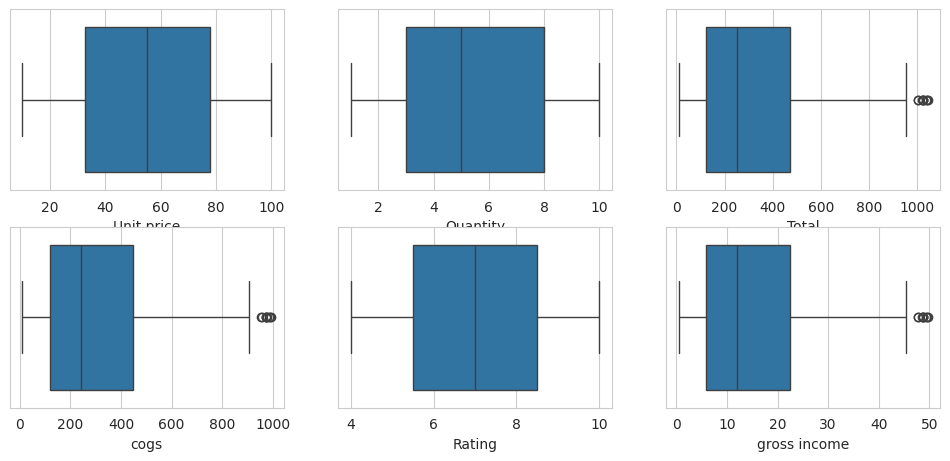

In [30]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Total',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Rating',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='gross income',data=df)
plt.show()

**KDEPlot ????**:

KDEPlot is a visualization tool that uses Kernel Density Estimation to estimate and display the probability density of continuous data. It creates a smooth curve that shows the distribution's shape, helping identify data patterns, peaks, and density. It provides a clearer and more detailed view of data distribution compared to histograms.

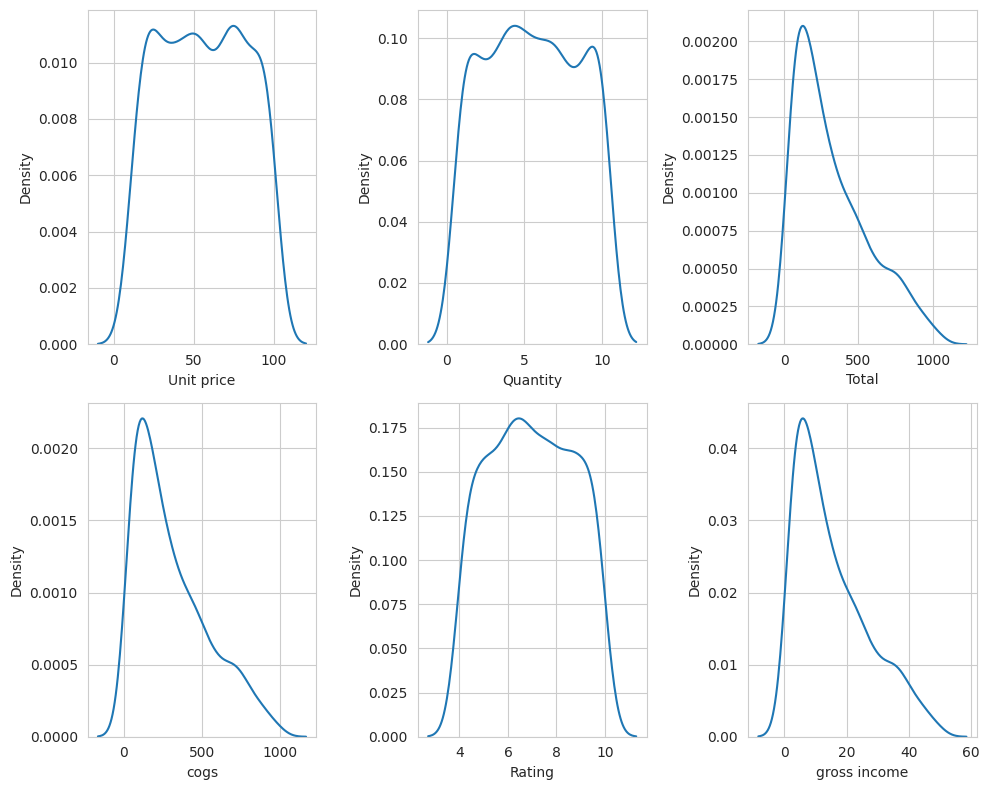

In [31]:
plt.figure(figsize=(10,8))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.kdeplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.kdeplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.kdeplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.kdeplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.kdeplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.kdeplot(x='gross income',data=df)
plt.tight_layout()
plt.show()

**Correlation**

In [72]:
from IPython.display import Image, display

image_url = "https://cdn1.byjus.com/wp-content/uploads/2021/03/Correlation.png"

display(Image(url=image_url))


In [33]:
correlation_matrix=df[columns_not_object].corr()
correlation_matrix



,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,DateTime
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,-0.006431
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.029601
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022920
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022920
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022920
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022920
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.043593
DateTime,-0.006431,-0.029601,-0.022920,-0.022920,-0.022920,NaN,-0.022920,-0.043593,1.000000


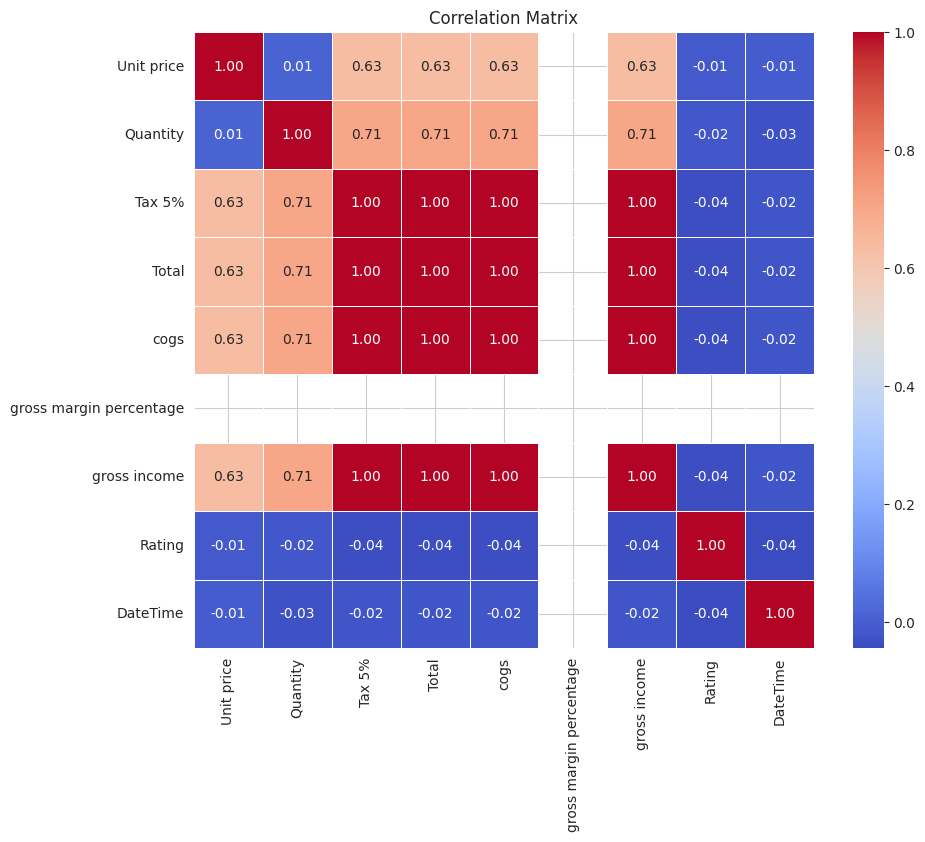

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Observation:**

The correlation matrix illustrates the relationships between features, with values near 1 or -1 indicating strong positive or negative correlations, respectively, and values close to 0 reflecting weak or negligible correlations. Features such as 'Tax 5%', 'Total', 'cogs', and 'gross income' exhibit high correlations (approximately 1), suggesting redundancy. To address multicollinearity and improve model efficiency, it may be beneficial to remove some of these features.

# Data Preprocessing


 the data has no issues of missing values, duplicates, inconsistent formats, noise, or outliers

In [35]:
df=df.drop(['Invoice ID'],axis=1)

'City' and 'Branch' represent the same attribute

In [36]:
df=df.drop(['City'],axis=1)

Drop the attribute with high correlation to others.

In [37]:
df=df.drop(['cogs','gross income','Tax 5%'],axis=1)


Drop the attribute 'gross margin percentage' because it has a single unique value.

In [38]:
df=df.drop(['gross margin percentage'],axis=1)

In [39]:
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,Rating,DateTime
0,A,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,9.1,15466.9368
1,C,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,9.6,15520.4094
2,A,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,7.4,15516.1938
3,A,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,8.4,15486.2118
4,A,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,5.3,15496.2222


# Feature Engineering

In [40]:
list_categorical=[]
for i in list(df.columns):
    if df[i].dtype=='object':
        list_categorical.append(i)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
encoder=LabelEncoder()

Label encoding

In [43]:
for i in list_categorical:
    df[i]=encoder.fit_transform(df[i])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   int64  
 1   Customer type  1000 non-null   int64  
 2   Gender         1000 non-null   int64  
 3   Product line   1000 non-null   int64  
 4   Unit price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Total          1000 non-null   float64
 7   Payment        1000 non-null   int64  
 8   Rating         1000 non-null   float64
 9   DateTime       1000 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 78.3 KB


# Splitting the data into training, validation, and testing dataset

In [45]:
y=df['Rating']
x=df.drop(['Rating'],axis=1)

In [46]:
from sklearn.model_selection import train_test_split

**The dataset is very small, so it can't be divided into training, validation, and testing sets**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)  # 80% training, 20% test

In [48]:
X_train.shape, X_test.shape

((800, 9), (200, 9))

In [49]:
y_train.shape, y_test.shape

((800,), (200,))

# Machine Learning Models

**Metrics**

Mean Absolute Error :MAE

Mean Squared Error :MSE

Root Mean Squared Error :RMSE

R-squared :R²

In [50]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

**Linear Regression Model**

In [51]:
from sklearn.linear_model import LinearRegression


In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# training

y_train_pred = model.predict(X_train)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Evaluation Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")


print('*'*30)

# Test

y_test_pred = model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Evaluation Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

Training Evaluation Metrics:
MAE: 1.4609450747855164
MSE: 2.8894955104817406
RMSE: 1.6998516142539444
R²: 0.01014796000344853
******************************
Test Evaluation Metrics:
MAE: 1.5328651563588074
MSE: 3.1364385754661135
RMSE: 1.7709993154900183
R²: -0.022373875567544665


The model is underfitting

**Decision Tree Regressor**

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
model =DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
# training

y_train_pred = model.predict(X_train)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Evaluation Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")


print('*'*30)

# Test

y_test_pred = model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Evaluation Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

Training Evaluation Metrics:
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R²: 1.0
******************************
Test Evaluation Metrics:
MAE: 1.9580000000000002
MSE: 5.6547
RMSE: 2.3779613117121987
R²: -0.8432427146489343


The model is overfitting

**Random Forest Regressor**

In [57]:
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

In [58]:
model =RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
# training

y_train_pred = model.predict(X_train)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Evaluation Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")


print('*'*30)

# Test

y_test_pred = model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Evaluation Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

Training Evaluation Metrics:
MAE: 0.5538925000000003
MSE: 0.43766547750000045
RMSE: 0.6615629051722901
R²: 0.8500693065042304
******************************
Test Evaluation Metrics:
MAE: 1.6117749999999995
MSE: 3.5577095749999987
RMSE: 1.8861891673424485
R²: -0.15969410489601654


The model is overfitting

**Gradient Boosting Regressor**

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
model =GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [62]:
# training

y_train_pred = model.predict(X_train)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Evaluation Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")


print('*'*30)

# Test

y_test_pred = model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Evaluation Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

Training Evaluation Metrics:
MAE: 1.13160809178741
MSE: 1.8068804671602146
RMSE: 1.3442025394858523
R²: 0.3810184823058361
******************************
Test Evaluation Metrics:
MAE: 1.5790915245610713
MSE: 3.318443315528018
RMSE: 1.8216594949463025
R²: -0.08170132196623592


The model is underfitting

**XGB Regressor model**

In [63]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [64]:
# training

y_train_pred = model.predict(X_train)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Evaluation Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")


print('*'*30)

# Test

y_test_pred = model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Evaluation Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

Training Evaluation Metrics:
MAE: 0.11726830589771271
MSE: 0.026676085948029744
RMSE: 0.16332815418056296
R²: 0.990861595735659
******************************
Test Evaluation Metrics:
MAE: 1.5862650361061097
MSE: 3.7904733257366785
RMSE: 1.9469137951477662
R²: -0.235567287872964


The model is overfitting

**SVR**

In [65]:
from sklearn.svm import SVR
model =SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [66]:
# training

y_train_pred = model.predict(X_train)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Evaluation Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")


print('*'*30)

# Test

y_test_pred = model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Evaluation Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

Training Evaluation Metrics:
MAE: 1.4673482046112443
MSE: 2.917309255048449
RMSE: 1.7080132479136245
R²: 0.0006198289856192973
******************************
Test Evaluation Metrics:
MAE: 1.5172004304968367
MSE: 3.0777341352015117
RMSE: 1.7543472105605298
R²: -0.003238195189227522


The model is underfitting

**KNeighbors Regressor**

In [67]:
from sklearn.neighbors import KNeighborsRegressor
model =KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [68]:
# training

y_train_pred = model.predict(X_train)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Evaluation Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")


print('*'*30)

# Test

y_test_pred = model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Evaluation Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

Training Evaluation Metrics:
MAE: 1.296575
MSE: 2.3939345
RMSE: 1.547234468333743
R²: 0.179911877403106
******************************
Test Evaluation Metrics:
MAE: 1.5751
MSE: 3.3901099999999995
RMSE: 1.8412251356094396
R²: -0.10506225959971305


The model is underfitting

**MLP Regressor**

In [69]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [70]:
# training

y_train_pred = model.predict(X_train)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Evaluation Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")


print('*'*30)

# Test

y_test_pred = model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Evaluation Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

Training Evaluation Metrics:
MAE: 1.5720623145437957
MSE: 3.4255708956649134
RMSE: 1.850829785708268
R²: -0.17349493256745308
******************************
Test Evaluation Metrics:
MAE: 1.6161486987642188
MSE: 3.698235339921822
RMSE: 1.923079649916202
R²: -0.2055007953327539


Underfitting: The model is not capturing the patterns in the training data effectively,

as indicated by the low R² score on the training set.